<a href="https://colab.research.google.com/github/Sonpositive/MAT421/blob/main/project1(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

<br> <ul> <li> Diabetes mellitus is a chronic disease that affects millions of people worldwide. It is characterized by elevated levels of blood glucose (sugar), which can lead to serious damage to the heart, blood vessels, eyes, kidneys, and nerves over time. There are several forms of diabetes, with Type 2 diabetes being the most common. Early diagnosis and intervention are crucial in managing diabetes and preventing or delaying its
complications</li> <li> This project aims to leverage machine learning to improve the diagnostic process
for diabetes. Utilizing a dataset originally from the National Institute of Diabetes and
Digestive and Kidney Diseases, we seek to predict the presence of diabetes in patients
with specific focus on a subset of the population: females of Pima Indian heritage aged
21 years and above. This demographic group has been shown to have a higher
prevalence of diabetes, making it a critical focus for early detection and healthcare
intervention.</li> <li> The dataset provided includes a variety of medical predictor variables alongside
one target variable, 'Outcome', which indicates the presence or absence of diabetes.
Predictor variables consist of several clinical measurements such as the number of
pregnancies, Body Mass Index (BMI), insulin levels, age, and others. By applying
numerical methods and machine learning algorithms, this project endeavors to identify
patterns and correlations within these predictors that contribute to an accurate diabetes
diagnosis.</li> <li> Our approach will involve a thorough analysis of the dataset, preprocessing to
ensure data quality, the application of appropriate numerical methods to understand the
underlying relationships, and the implementation of machine learning models to predict
diabetes occurrence. This interdisciplinary project resides at the intersection of data
science, medicine, and public health, with the potential to inform clinical practices and
support decision-making processes in healthcare settings</li> </ul>
<br>
## Theory (Models and Numerical Methods)

<br>

#### Models:  Logistic Regression
Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (where there are only two possible outcomes). It is used to predict the probability of a categorical dependent variable. Unlike Naive Bayes, it doesn’t require the independent features to be conditionally independent. It works with a logistic function to model the probability that each input belongs to a certain category, which is why it’s particularly useful for binary classification problems. Logistic Regression can be extended to handle multi-class classification problems, albeit with modifications to its basic model. Despite its relative simplicity, it is a powerful model that is used widely in the fields of medicine, economics, and more.

#### Numerical Method:  Gradient descent

Gradient descent is an iterative optimization algorithm for finding a local minimum of a differentiable function.
Gradient descent finds the set of parameters (weights and biases) that minimize the cost function for logistic regression.


In [ ]:
NAME = "Hongju Son"
Student ID = 1223480414

SyntaxError: invalid syntax (<ipython-input-3-36c3bfa9dfaf>, line 2)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## Data
<br>

<br>
We use data set `diabetes.csv`, from *the National Institute of Diabetes and Digestive and Kidney Diseases*: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database. <br>

<br>




In [ ]:
df = pd.read_csv('diabetes.csv')

print(df.shape)

df

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Each row (i.e. observation) represents a single patient. The last variable, `Outcome`, is binary (Yes/No) and indicates presence of diabets. This variable will be our output categorical variable. All other variables except the first one (PatientID) are our predictors/features.<br>

<br>


## Data munging and cleaning
<br>

<br>
While analyzing the structure of the data set, we can see that the minimum values for Glucose, Bloodpressure, Skinthickness, Insulin, and BMI are all zero. This is not ideal since no one can have a value of zero for Glucose, blood pressure, etc. Therefore,  such values are treated as missing observations.

In [ ]:

columns_with_zeros_as_na = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age']

df[columns_with_zeros_as_na] = df[columns_with_zeros_as_na].replace(0, np.nan)

print(df.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


<br>To check how many missing values we have now, let’s visualize the data:

<br>

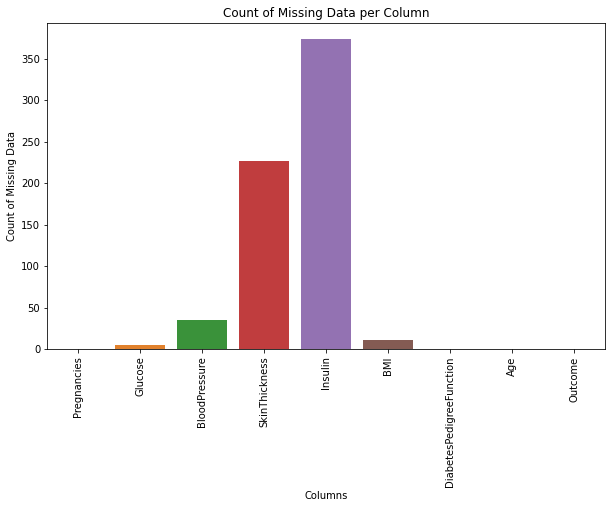

In [ ]:
#see whether there are missing data in the some columns


missing_data = df.isnull().sum()

# Now you create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xlabel('Columns')
plt.ylabel('Count of Missing Data')
plt.title('Count of Missing Data per Column')
plt.xticks(rotation=90)  # This rotates the column names so they don't overlap
plt.show()


<br>The above illustrations show that our data set has plenty missing values and removing all of them will leave us with an even smaller data set, the code below addresses the issue of handling missing data in our dataset.

First, we define a list, columns_with_zeros_as_na, containing the names of these columns. We then use this list to replace zero values with NaN in the specified columns of the DataFrame df. By doing so, we make the missing data explicit in the DataFrame.

After marking the missing data, we proceed to clean the DataFrame by removing rows that contain any NaN values with the dropna() method, resulting in df_cleaned. This method removes all rows with missing values in any column.

Finally, we print the shape of df_cleaned to verify how many rows remain after dropping rows with missing values. In this case, df_cleaned contains 392 rows and 9 columns, indicating that rows with any missing values have been successfully dropped from the original dataset.
<br>
<br>


In [ ]:
import pandas as pd

columns_with_zeros_as_na = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zeros_as_na] = df[columns_with_zeros_as_na].replace(0, pd.NA)

df_cleaned = df.dropna()

print(df_cleaned.shape)




(392, 9)


## Data visaulization


<br>
<br>

Now let’s perform a couple of visualizations to take a better look at each variable, this stage is essential to understand the significance of each predictor variable.

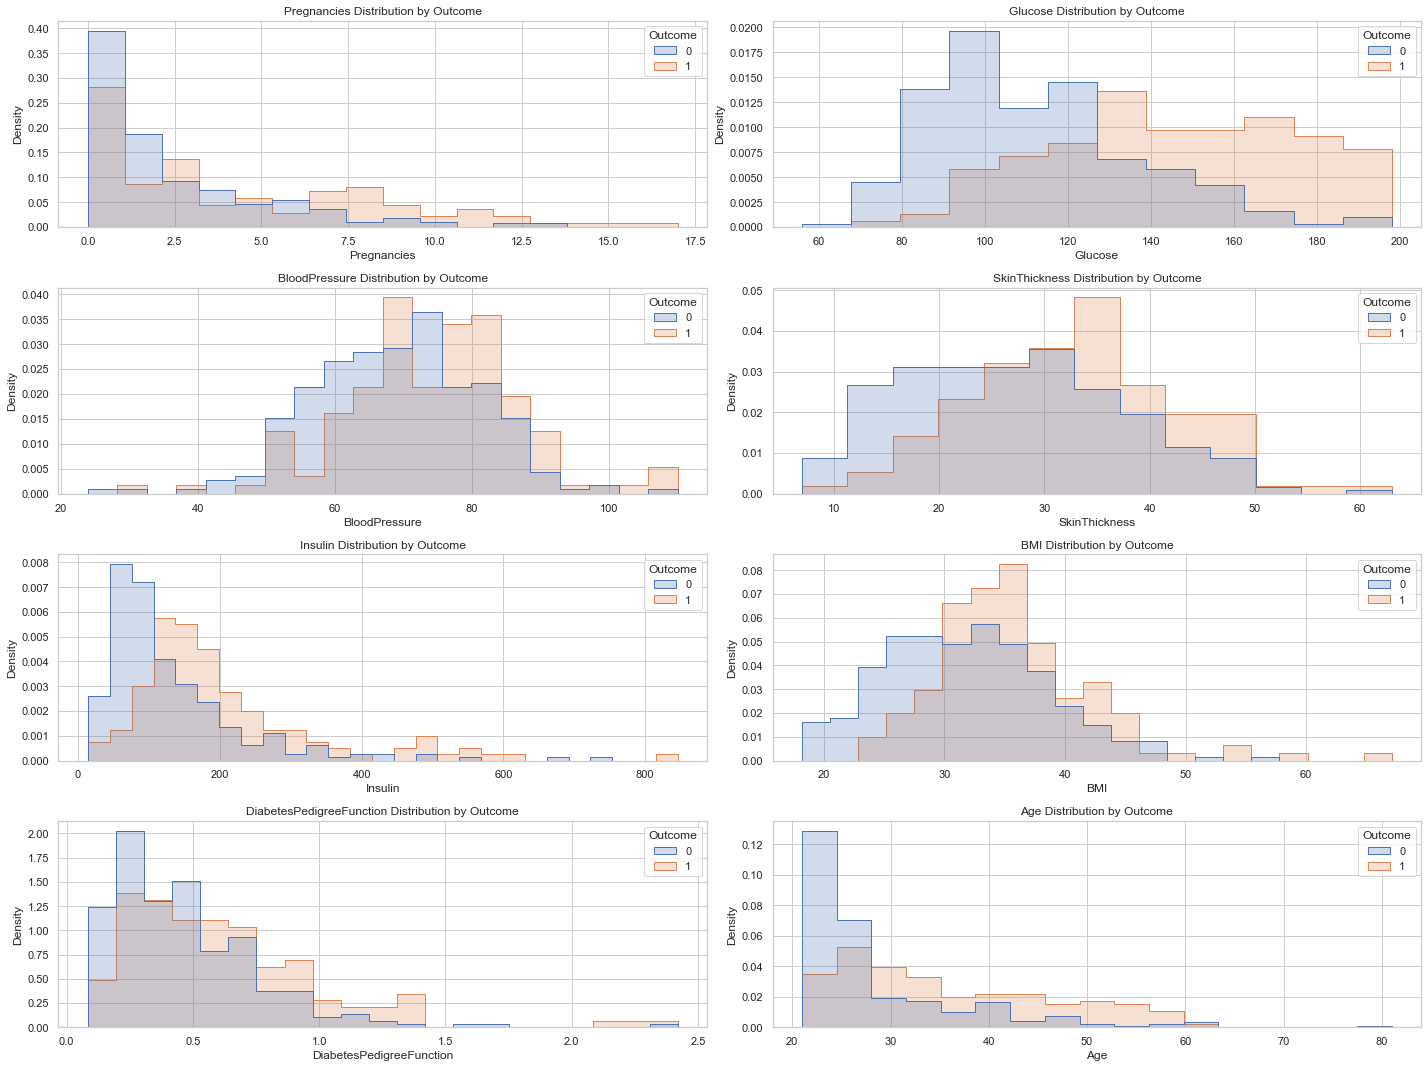

In [ ]:

sns.set(style="whitegrid")

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


plt.figure(figsize=(20, 15))

for index, feature in enumerate(features):
    plt.subplot(len(features)//2, 2, index+1)
    sns.histplot(data=df_cleaned, x=feature, hue="Outcome", element="step", stat="density", common_norm=False)
    plt.title(f'{feature} Distribution by Outcome')

plt.tight_layout()
plt.show()


<br>

we make The heatmap illustrating that the Pearson correlation coefficients between various clinical measures, presumably from a dataset focused on diabetes. These coefficients span from -1 to 1: a value of 1 signals a strong direct correlation, -1 indicates a strong inverse correlation, and 0 suggests no apparent linear relationship. More intense colors denote stronger correlations.

Observing the heatmap, we note that the correlation coefficients for each variable are relatively minimal, hovering near zero. This implies a lack of strong linear relationships between the features, suggesting that they are largely independent of one another.

<br>





<ipython-input-47-5889425d5d52>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col]= pd.to_numeric(df_cleaned[col], errors='coerce')


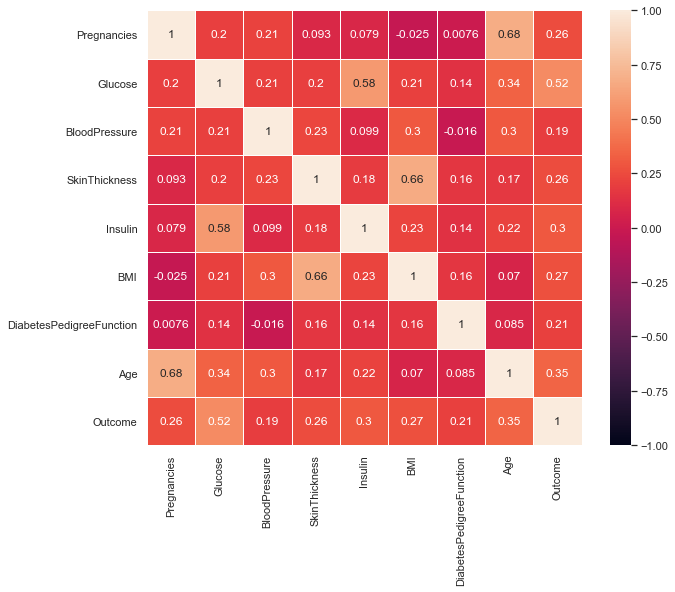

In [ ]:
cols_to_convert = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_convert:
    df_cleaned[col]= pd.to_numeric(df_cleaned[col], errors='coerce')

corr = df_cleaned.corr(method="pearson")

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmax=1, vmin=-1,  square=True, linewidths=.5, annot=True)
plt.show()


<br>


The visualizations generated by the code are histograms for each clinical feature in the dataset, with a kernel density estimate (KDE) overlaid in red. The KDE helps in visualizing the distribution shape of the data. Each histogram corresponds to a different clinical variable, such as 'Pregnancies', 'Glucose', and so on, and is plotted in its respective subplot.

The Shapiro-Wilk test results, printed below the histograms, help determine if the data for each feature comes from a normally distributed population. A p-value greater than the chosen alpha level (commonly 0.05) suggests that the null hypothesis of normality cannot be rejected, indicating the feature is normally distributed. Conversely, a p-value below the threshold suggests non-normality.

Additionally, Q-Q plots are generated for each feature to further assess normality. If the data points fall along the 45-degree line in the Q-Q plot, the distribution is considered normal. Deviations from the line indicate deviations from normality.

<br>
<br>


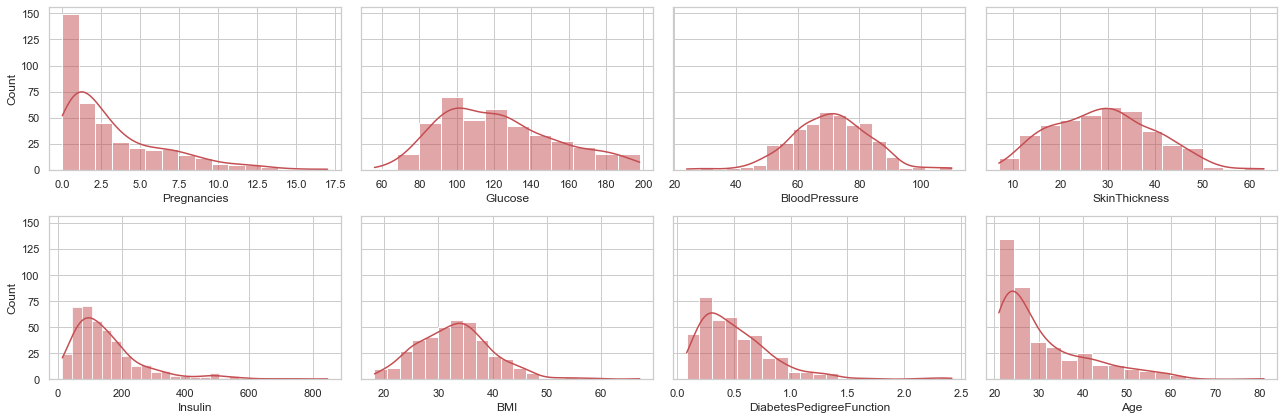

Pregnancies: Statistics=0.8529521822929382, p-value=1.0224597572033213e-18
Pregnancies does not look Gaussian (reject H0)

Glucose: Statistics=0.9642307162284851, p-value=3.441981633045543e-08
Glucose does not look Gaussian (reject H0)

BloodPressure: Statistics=0.9899436235427856, p-value=0.008709317073225975
BloodPressure does not look Gaussian (reject H0)

SkinThickness: Statistics=0.9875801205635071, p-value=0.001991149503737688
SkinThickness does not look Gaussian (reject H0)

Insulin: Statistics=0.8040083050727844, p-value=1.9034853669974744e-21
Insulin does not look Gaussian (reject H0)

BMI: Statistics=0.9738404154777527, p-value=1.65644644312124e-06
BMI does not look Gaussian (reject H0)

DiabetesPedigreeFunction: Statistics=0.8485816717147827, p-value=5.501850706704447e-19
DiabetesPedigreeFunction does not look Gaussian (reject H0)

Age: Statistics=0.8383048176765442, p-value=1.3475056521824386e-19
Age does not look Gaussian (reject H0)

Outcome: Statistics=0.5939034223556519

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


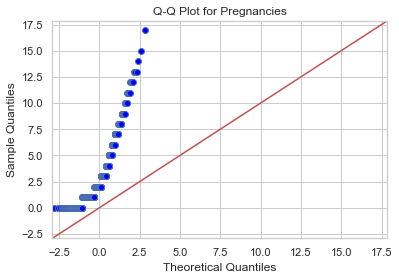

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


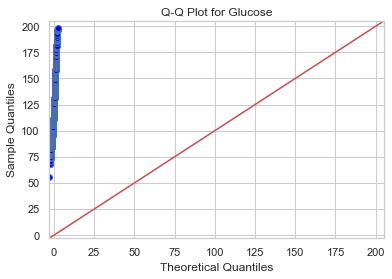

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


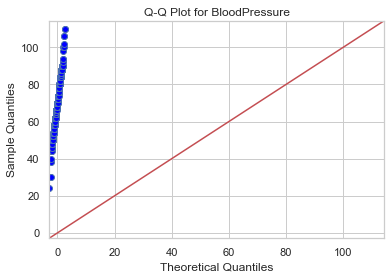

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


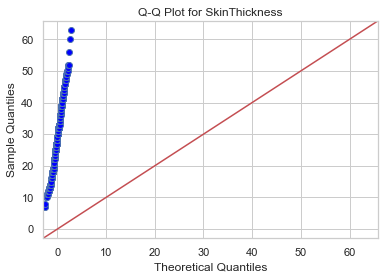

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


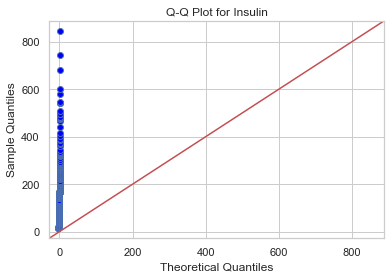

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


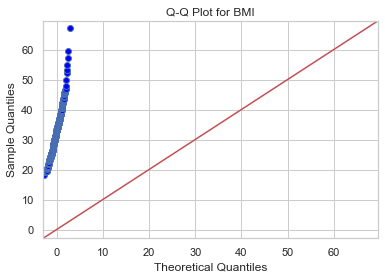

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


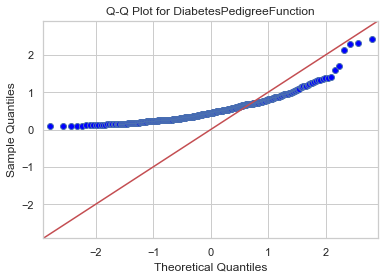

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


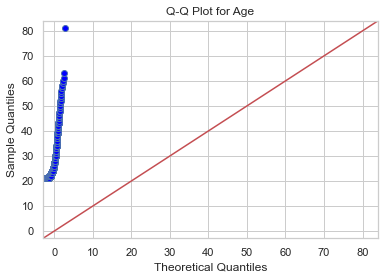

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


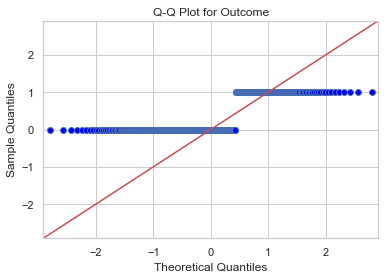

In [ ]:

fig, axes = plt.subplots(2, 4, figsize=(18, 6), sharey=True)

sns.histplot(df_cleaned, ax=axes[0, 0], x="Pregnancies", kde=True, color='r')
sns.histplot(df_cleaned, ax=axes[0, 1], x="Glucose", kde=True, color='r')
sns.histplot(df_cleaned, ax=axes[0, 2], x="BloodPressure", kde=True, color='r')
sns.histplot(df_cleaned, ax=axes[0, 3], x="SkinThickness", kde=True, color='r')
sns.histplot(df_cleaned, ax=axes[1, 0], x="Insulin", kde=True, color='r')
sns.histplot(df_cleaned, ax=axes[1, 1], x="BMI", kde=True, color='r')
sns.histplot(df_cleaned, ax=axes[1, 2], x="DiabetesPedigreeFunction", kde=True, color='r')
sns.histplot(df_cleaned, ax=axes[1, 3], x="Age", kde=True, color='r')

plt.tight_layout()
plt.show()


import scipy.stats as stats

features_to_test = df_cleaned.columns

for feature in features_to_test:
    stat, p_value = stats.shapiro(df_cleaned[feature])
    print(f'{feature}: Statistics={stat}, p-value={p_value}')
    alpha = 0.05
    if p_value > alpha:
        print(f'{feature} looks Gaussian (fail to reject H0)\n')
    else:
        print(f'{feature} does not look Gaussian (reject H0)\n')

import statsmodels.api as sm
import matplotlib.pyplot as plt

for feature in features_to_test:
    sm.qqplot(df_cleaned[feature], line ='45')
    plt.title(f'Q-Q Plot for {feature}')
    plt.show()


<br>

Since the features in the dataset exhibit non-normal distributions as indicated by the Shapiro-Wilk test and Q-Q plots, and Naive Bayes assumes feature normality for continuous variables, it is not proper to build the model with Naive Bayes. Hence, given the robustness of logistic regression to the distribution of predictor variables and its lack of distributional assumptions, it might be best to build up a logistic regression model.

<br>


<br>

## Fit Logistic Regression medel on train, predict on test data


we should test performance on a data set not used for training the model. For that purpose, we sacrifize some data and instead of using them for training, we only use them for testing. We split the original data into training and test data at the ratio, say, 70/30.

So, we are going to perform the following 3 steps:

- split the original data into train and test datasets
- make a model and fit it on the train data
- predict on the test data



<br>

In [ ]:
df_cleaned['Outcome'].value_counts(normalize = True)


0    0.668367
1    0.331633
Name: Outcome, dtype: float64

In [ ]:
#set seed
np.random.seed(1234)

data_randomized = df_cleaned.sample(frac = 1)


trainsize = round(len(data_randomized)* 0.7)

training_set = data_randomized[:trainsize].reset_index(drop=True)
test_set = data_randomized[trainsize:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)


(274, 9)
(118, 9)


In [ ]:
training_set['Outcome'].value_counts(normalize=True)


0    0.649635
1    0.350365
Name: Outcome, dtype: float64

In [ ]:
test_set['Outcome'].value_counts(normalize=True)


0    0.711864
1    0.288136
Name: Outcome, dtype: float64

In [ ]:
trainX = training_set.iloc[:,:-1]
trainY = training_set['Outcome']

trainX

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,142.0,82.0,18.0,64.0,24.7,0.761,21
1,1,122.0,90.0,51.0,220.0,49.7,0.325,31
2,2,82.0,52.0,22.0,115.0,28.5,1.699,25
3,1,118.0,58.0,36.0,94.0,33.3,0.261,23
4,3,124.0,80.0,33.0,130.0,33.2,0.305,26
...,...,...,...,...,...,...,...,...
269,1,143.0,84.0,23.0,310.0,42.4,1.076,22
270,10,68.0,106.0,23.0,49.0,35.5,0.285,47
271,6,119.0,50.0,22.0,176.0,27.1,1.318,33
272,3,129.0,64.0,29.0,115.0,26.4,0.219,28


In [ ]:
trainY.head()

0    0
1    1
2    0
3    0
4    0
Name: Outcome, dtype: int64

In [ ]:
testX = test_set.iloc[:,:-1]
testY = test_set['Outcome']

colnames = testX.columns


testX

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,130.0,70.0,13.0,105.0,25.9,0.472,22
1,13,152.0,90.0,33.0,29.0,26.8,0.731,43
2,8,181.0,68.0,36.0,495.0,30.1,0.615,60
3,1,126.0,56.0,29.0,152.0,28.7,0.801,21
4,4,90.0,88.0,47.0,54.0,37.7,0.362,29
...,...,...,...,...,...,...,...,...
113,5,136.0,84.0,41.0,88.0,35.0,0.286,35
114,7,160.0,54.0,32.0,175.0,30.5,0.588,39
115,4,154.0,72.0,29.0,126.0,31.3,0.338,37
116,3,173.0,84.0,33.0,474.0,35.7,0.258,22


## Creating the logistic regression model

#### Mathematical Formulation:

 <ul> <li>Mathematical Formulation: The logistic regression model can be represented as: Probability(Y = 1|X) =  1/1+e^-z where  z = b0+b1x1+b2x2...+bnxn is the linear combination of the feature values with their corresponding weights (coefficients), and b0 is the intercept term.</li></ul>

    
#### Parameter Estimation:
   <ul> <li>The goal of logistic regression is to estimate the parameters (weights and intercept) that best fit the training data.</li>
   <li>This is typically done by maximizing the likelihood function or minimizing the cost function, which measures the difference between the predicted probabilities and the actual labels.</li></ul>
    
   
#### Gradient Descent Optimization:
<ul> <li>Gradient descent is an optimization algorithm used to update the parameters iteratively in the direction of the steepest descent of the cost function.</li>
<li>Given the learned weights and intercept, the logistic function is applied to the linear combination of feature values to obtain the predicted probability.</li>
<li>Typically, a threshold of 0.5 is used to classify instances into one of the two classes based on the predicted probability.</li>
</ul>

#### Prediction:
<ul> <li>Once the parameters are estimated, predictions can be made for new instances.</li>
<li>In logistic regression, gradient descent is employed to minimize the negative log-likelihood or the cross-entropy loss function.</li>
<li>At each iteration, the gradient of the cost function with respect to each parameter is computed, and the parameters are updated by taking steps proportional to the negative of the gradient.</li>
</ul>

In [ ]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for i in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [0 if y<=0.5 else 1 for y in y_predicted]
        return np.array(y_predicted_cls)

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self._sigmoid(model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in predictions]
        return np.array(y_predicted_cls)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

## Training and predicting

after creating the logistic regression model, train it with the trainX and trainY set and predict with testX
<br>


In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(trainX, trainY)



log_reg.fit(trainX, trainY)

logreg_predictions = log_reg.predict(testX)

pd.crosstab(logreg_predictions, testY)

Outcome,0,1
row_0,,
0,71,13
1,13,21


In [ ]:
accuracy_score(logreg_predictions, testY)


0.7796610169491526